## Madison Chester & Arturo Fredes

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1 Introduction

In [2]:
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)

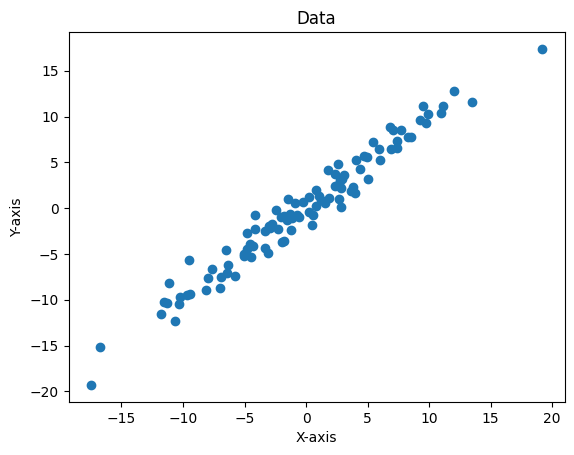

In [3]:
plt.scatter(points[:, 0], points[:, 1])

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data')

plt.show()

w0: 0.12330569399524369
w1: 0.9671827497060669
MSE: 155.16553309979125


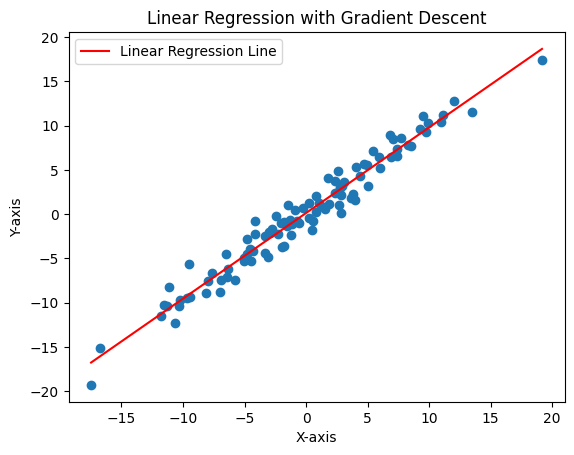

In [4]:
a = 0.01
num_iter = 1000
stop_criteria = 1e-5

w0 = 0.0
w1 = 0.0

x = points[:, 0]
y = points[:, 1]

def Q(x, y, w0, w1):
    y_pred = w1 * x + w0
    mse = ((y - y_pred) ** 2).mean()
    return mse

def gradient_Q(x, y, w0, w1):
    n = len(x)
    y_pred = w1 * x + w0
    gradient_w0 = (-2/n) * (y - y_pred).sum()
    gradient_w1 = (-2/n) * (x * (y - y_pred)).sum()
    return gradient_w0, gradient_w1

for i in range(num_iter):
    gradient_w0, gradient_w1 = gradient_Q(x, y, w0, w1)
    w0 -= a * gradient_w0
    w1 -= a * gradient_w1

    if (np.sqrt((gradient_w0)**2 + (gradient_w1)**2) < stop_criteria):
      break

print("w0:", w0)
print("w1:", w1)

plt.scatter(x,y)

x_range = np.linspace(min(x), max(x), 100)
y_pred = w1 * x_range + w0
plt.plot(x_range, y_pred, color='red', label='Linear Regression Line')
print("MSE:", np.sum((y_pred-y)**2)/len(x))

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression with Gradient Descent')

plt.legend()

plt.show()

w0: 0.47059106581106325
w1: 0.5861529045696244
MSE: 195.01917169044546


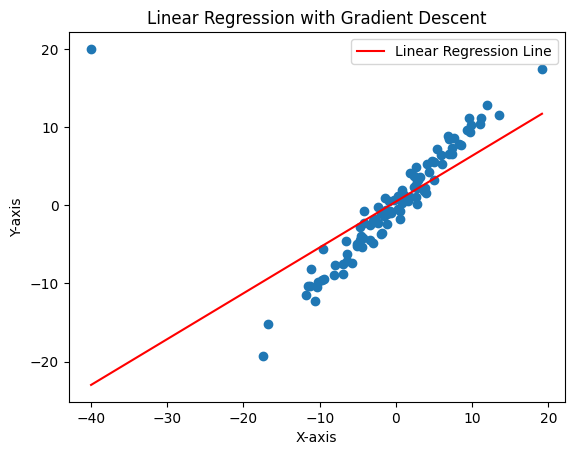

In [5]:
points[1]=[-40,20]

for i in range(num_iter):
    gradient_w0, gradient_w1 = gradient_Q(x, y, w0, w1)
    w0 -= a * gradient_w0
    w1 -= a * gradient_w1

    if (np.sqrt((gradient_w0)**2 + (gradient_w1)**2) < stop_criteria):
      break

print("w0:", w0)
print("w1:", w1)

plt.scatter(x,y)

x_range = np.linspace(min(x), max(x), 100)
y_pred = w1 * x_range + w0
plt.plot(x_range, y_pred, color='red', label='Linear Regression Line')
print("MSE:", np.sum((y_pred-y)**2)/len(x))

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression with Gradient Descent')

plt.legend()

plt.show()

w0: -0.36369757229720084
w1: 0.9215783361070563
MSE: 204.01277080284424


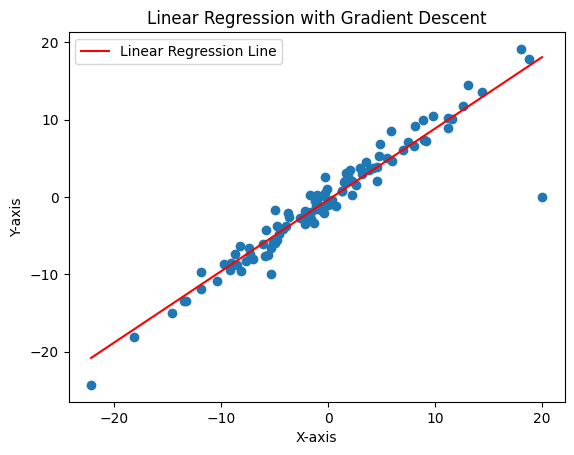

In [6]:
points = np.random.multivariate_normal(m,s,100)
points[1]=[20,0]

x = points[:, 0]
y = points[:, 1]

for i in range(num_iter):
    gradient_w0, gradient_w1 = gradient_Q(x, y, w0, w1)
    w0 -= a * gradient_w0
    w1 -= a * gradient_w1

    if (np.sqrt((gradient_w0)**2 + (gradient_w1)**2) < stop_criteria):
      break

print("w0:", w0)
print("w1:", w1)

plt.scatter(x,y)

x_range = np.linspace(min(x), max(x), 100)
y_pred = w1 * x_range + w0
plt.plot(x_range, y_pred, color='red', label='Linear Regression Line')
print("MSE:", np.sum((y_pred-y)**2)/len(x))

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression with Gradient Descent')

plt.legend()

plt.show()

w0: -0.26410466119174325
w1: 0.3944694012250903
MSE: 128.22916007282782


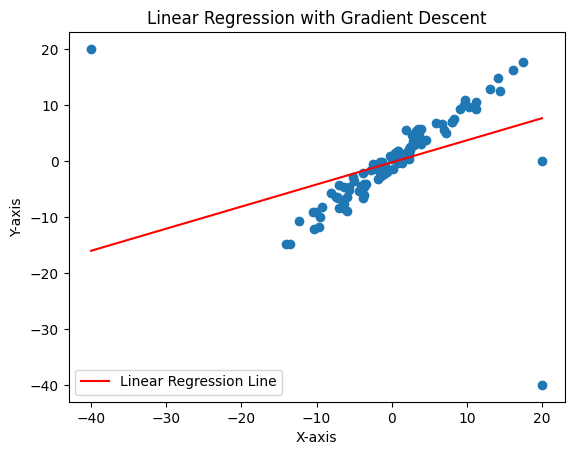

In [7]:
points = np.random.multivariate_normal(m,s,100)
points[1]=[-40,20]
points[2]=[20,0]
points[3]=[20,-40]

x = points[:, 0]
y = points[:, 1]

for i in range(num_iter):
    gradient_w0, gradient_w1 = gradient_Q(x, y, w0, w1)
    w0 -= a * gradient_w0
    w1 -= a * gradient_w1

    if (np.sqrt((gradient_w0)**2 + (gradient_w1)**2) < stop_criteria):
      break

print("w0:", w0)
print("w1:", w1)

plt.scatter(x,y)

x_range = np.linspace(min(x), max(x), 100)
y_pred = w1 * x_range + w0
plt.plot(x_range, y_pred, color='red', label='Linear Regression Line')
print("MSE:", np.sum((y_pred-y)**2)/len(x))

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression with Gradient Descent')

plt.legend()

plt.show()

# 2 Robust functions

 The reason is that the error the LSM has to minimise in the case of the outlier is
very large, which contributes more to the fit than the resulting fitting coefficients. The outliers may
thus have a large influence in the numerical values of the parameters to be estimated. We will plot the LSE and the Cauchy function to see how we can solve this problem using more robust error functions.

$$LSE: \ \ \ \  \rho(u)=\frac{1}{2}u^2$$

$$Cauchy: \ \ \ \ \rho(u)=\frac{c^2}{2}log(1+(\frac{u}{c})^2)$$

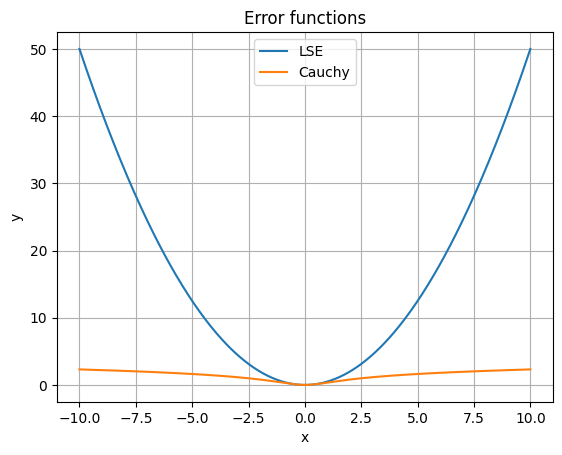

In [8]:
# generate x-values from -10 to 10
# can adjust the number of points (400 in this example) for smoother or coarser curves
x = np.linspace(-10, 10, 400)

# calculate y-values using the function 0.5 * x^2
y = 0.5 * x**2
c=1
y_c=c**2/2*np.log(1+(x/c)**2)

# create the plot
plt.plot(x, y, label='LSE')
plt.plot(x, y_c, label='Cauchy')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Error functions')
plt.grid(True)
plt.legend()
plt.show()

As we can see, the contribution from outliers in the case of the Cauchy function is much smaller in comparison to LSE. Now, we will implement a Gradient descent algorithm using both functions and compare them.

In [9]:
# create the data set
m = [0.,0.]
angle = 45*np.math.pi/180
rot = np.array([[np.math.cos(angle), -np.math.sin(angle)], [np.math.sin(angle),
np.math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)

In [10]:
# LSE
a = 0.01
num_iter = 1000
stop_criteria = 1e-5

w0_lse = 0.0
w1_lse = 0.0

x = points[:, 0]
y = points[:, 1]

def Q(x, y, w0, w1):
    y_pred = w1 * x + w0
    mse = ((y - y_pred) ** 2).mean()
    return mse

def gradient_Q(x, y, w0, w1):
    n = len(x)
    y_pred = w1 * x + w0
    gradient_w0 = (-2/n) * (y - y_pred).sum()
    gradient_w1 = (-2/n) * (x * (y - y_pred)).sum()
    return gradient_w0, gradient_w1

for i in range(num_iter):
    gradient_w0, gradient_w1 = gradient_Q(x, y, w0_lse, w1_lse)
    w0_lse -= a * gradient_w0
    w1_lse -= a * gradient_w1

    if (np.sqrt((gradient_w0)**2 + (gradient_w1)**2) < stop_criteria):
      break

print("w0:", w0_lse)
print("w1:", w1_lse)

w0: -0.12326663322275466
w1: 0.985399366451777


In [11]:
# Cauchy
a = 0.01
num_iter = 1000
stop_criteria = 1e-5
c=1

w0_c = 0.0
w1_c = 0.0

x = points[:, 0]
y = points[:, 1]

def Cauchy(x, y, w0, w1,c):
    y_pred = w1 * x + w0
    cauchy = c**2/2*np.log(1+((y - y_pred)/c)**2)
    return cauchy

def gradient_Cauchy(x, y, w0, w1,c):
    n = len(x)
    y_pred = w1 * x + w0

    gradient_w0 = ((-c**3/n) * (y - y_pred)/(c**2+(y - y_pred)**2)).sum()
    gradient_w1 = ((-c**3/n) * x * (y - y_pred)/(c**2+(y - y_pred)**2)).sum()
    return gradient_w0, gradient_w1

for i in range(num_iter):
    gradient_w0, gradient_w1 = gradient_Cauchy(x, y, w0_c, w1_c,c)
    w0_c -= a * gradient_w0
    w1_c -= a * gradient_w1

    if (np.sqrt((gradient_w0)**2 + (gradient_w1)**2) < stop_criteria):
      break

print("w0:", w0_c)
print("w1:", w1_c)

w0: -0.054542986823452044
w1: 1.0092309664524854


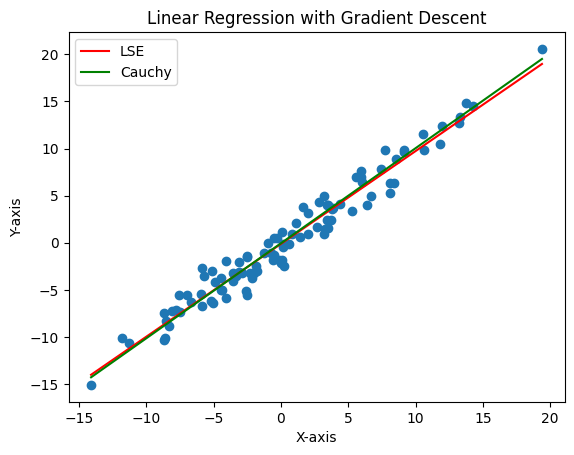

In [12]:
plt.scatter(x,y)
x_range = np.linspace(min(x), max(x), 100)
y_pred_lse = w1_lse * x_range + w0_lse
plt.plot(x_range, y_pred_lse, color='red', label='LSE')

y_pred_c = w1_c * x_range + w0_c
plt.plot(x_range, y_pred_c,  label='Cauchy',color='green')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression with Gradient Descent')

plt.legend()

plt.show()

As we can see, the result from implementing both error functions is similar in a data set without outliers. Now we will check if using the Cauchy function as our error function improves the fit when there are outliers in the data set.

LSE:
w0: 0.4913205947700443
w1: 0.5742834002918413
Cauchy:
w0: -0.04857809398391575
w1: 1.0089003122237037


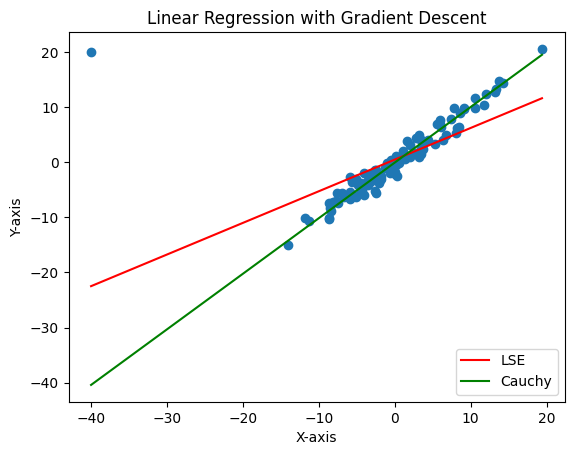

In [13]:
# add an outlier
points[1]=[-40,20]

a = 0.01
num_iter = 1000
stop_criteria = 1e-5
c = 1

w0_lse = 0.0
w1_lse = 0.0
w0_c = 0.0
w1_c = 0.0

# LSE
for i in range(num_iter):
    gradient_w0, gradient_w1 = gradient_Q(x, y, w0_lse, w1_lse)
    w0_lse -= a * gradient_w0
    w1_lse -= a * gradient_w1

    if (np.sqrt((gradient_w0)**2 + (gradient_w1)**2) < stop_criteria):
      break
print('LSE:')
print("w0:", w0_lse)
print("w1:", w1_lse)

# Cauchy
for i in range(num_iter):
    gradient_w0, gradient_w1 = gradient_Cauchy(x, y, w0_c, w1_c,c)
    w0_c -= a * gradient_w0
    w1_c -= a * gradient_w1

    if (np.sqrt((gradient_w0)**2 + (gradient_w1)**2) < stop_criteria):
      break
print('Cauchy:')
print("w0:", w0_c)
print("w1:", w1_c)


# create a plot
plt.scatter(x,y)
x_range = np.linspace(min(x), max(x), 100)
y_pred_lse = w1_lse * x_range + w0_lse
plt.plot(x_range, y_pred_lse, color='red', label='LSE')

y_pred_c = w1_c * x_range + w0_c
plt.plot(x_range, y_pred_c,  label='Cauchy',color='green')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression with Gradient Descent')

plt.legend()

plt.show()

As we can see, the effect of having an outlier in our data is much less noticeable when using the Cauchy function, and the result is a better fit than when using LSE.


Now, we will test the influence of the parameter c. The results of Cauchy are checked with c-values of 1/1000, 1/100, 1, and 100. This is represented in the first column. In the second column, the histogram of the error function, |u|, is plotted for both Cauchy and LSE. Lastly, the third column contains the shape corresponding to ρ(u).

Cauchy (c=0.001):
w0: 1.5467820000219495e-12
w1: 7.806751562509652e-12
LSE (c=0.001):
w0: 0.004417950260693215
w1: 0.9695587347027566
Cauchy (c=0.01):
w0: 1.5408676005804903e-09
w1: 7.815086099533967e-09
LSE (c=0.01):
w0: 0.004417950260693215
w1: 0.9695587347027566
Cauchy (c=1):
w0: 0.041316484196988294
w1: 0.9696296303691334
LSE (c=1):
w0: 0.004417950260693215
w1: 0.9695587347027566
Cauchy (c=100):
w0: -8.52318040818651
w1: -132.83452578137806
LSE (c=100):
w0: 0.004417950260693215
w1: 0.9695587347027566


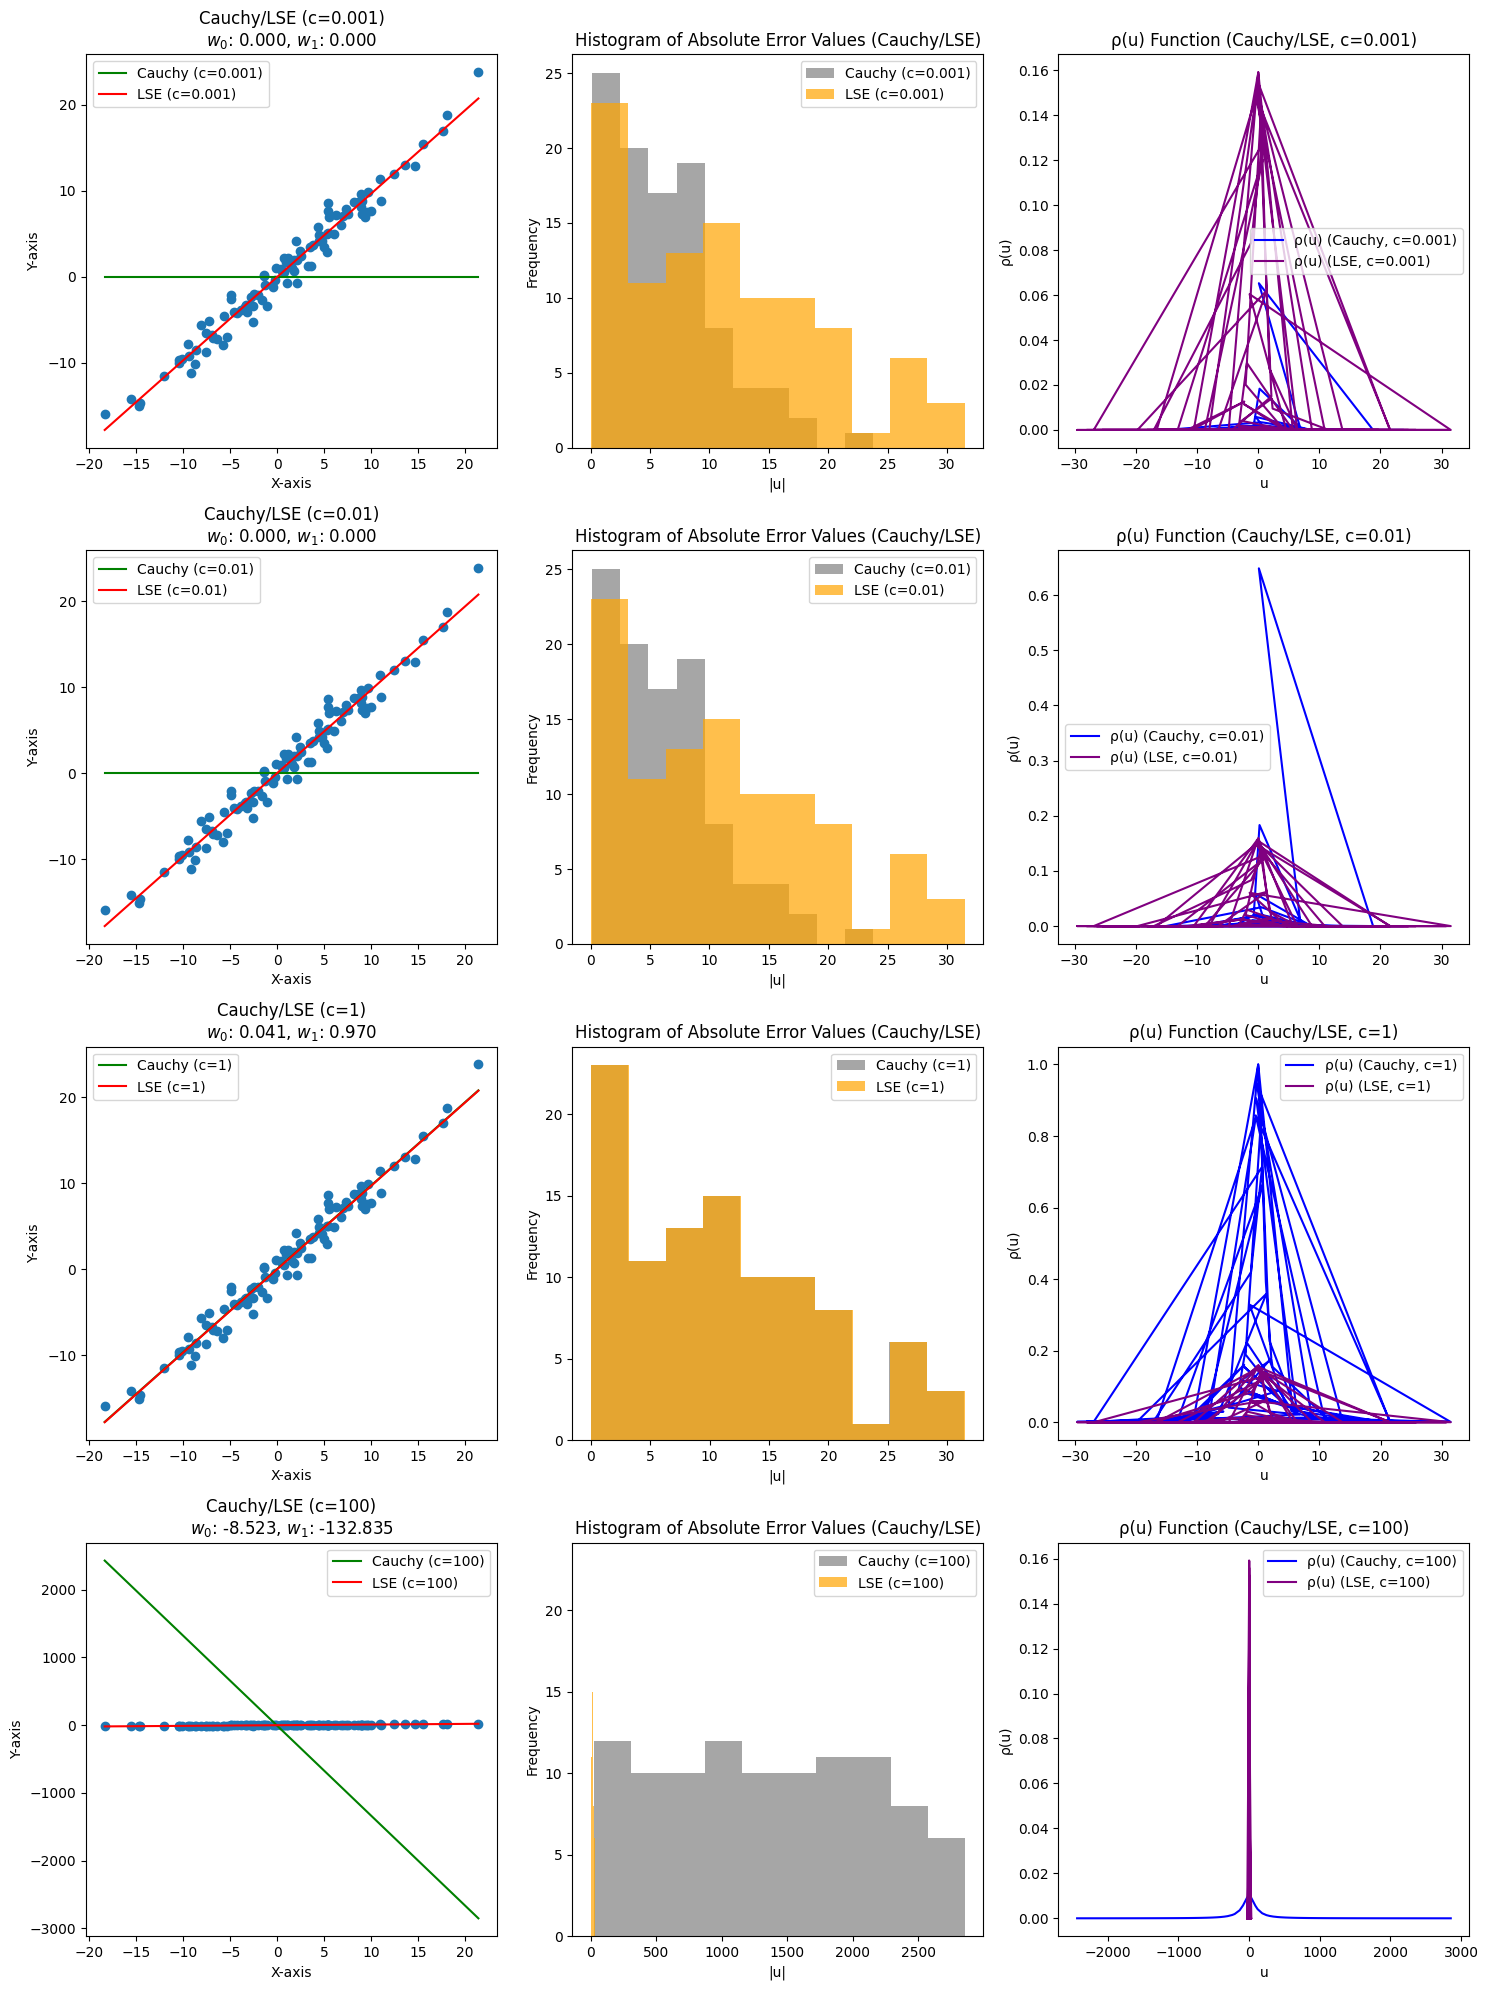

In [14]:
# create the data set
m = [0.,0.]
angle = 45*np.math.pi/180
rot = np.array([[np.math.cos(angle), -np.math.sin(angle)], [np.math.sin(angle),
np.math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)

a = 0.01
num_iter = 1000
stop_criteria = 1e-5
c_values = [1/1000, 1/100, 1, 100]

x = points[:, 0]
y = points[:, 1]

# create a 4x3 grid of plots
fig, axes = plt.subplots(4, 3, figsize=(15, 20))

for i, c in enumerate(c_values):

    # Cauchy
    w0_c = 0.0
    w1_c = 0.0

    for _ in range(num_iter):
        gradient_w0, gradient_w1 = gradient_Cauchy(x, y, w0_c, w1_c, c)
        w0_c -= a * gradient_w0
        w1_c -= a * gradient_w1

        if np.sqrt(gradient_w0**2 + gradient_w1**2) < stop_criteria:
            break

    print(f'Cauchy (c={c}):')
    print("w0:", w0_c)
    print("w1:", w1_c)

    # create a plot on the grid for Cauchy
    row = i
    ax_cauchy = axes[row, 0]
    ax_cauchy.scatter(x, y)
    x_range = np.linspace(min(x), max(x), 100)
    y_pred_c = w1_c * x_range + w0_c
    ax_cauchy.plot(x_range, y_pred_c, label=f'Cauchy (c={c})', color='green')
    ax_cauchy.set_xlabel('X-axis')
    ax_cauchy.set_ylabel('Y-axis')
    ax_cauchy.set_title(f'Cauchy/LSE (c={c})\n$w_0$: {w0_c:.3f}, $w_1$: {w1_c:.3f}')
    ax_cauchy.legend()

    # calculate the error values for Cauchy
    u_cauchy = y - y_pred_c

    # create a histogram of the absolute error values for Cauchy
    ax_hist_cauchy = axes[row, 1]
    ax_hist_cauchy.hist(np.abs(u_cauchy), bins=10, color = 'gray', alpha=0.7, label =f'Cauchy (c={c})')
    ax_hist_cauchy.set_xlabel('|u|')
    ax_hist_cauchy.set_ylabel('Frequency')
    ax_hist_cauchy.set_title('Histogram of Absolute Error Values (Cauchy/LSE)')
    ax_hist_cauchy.legend()

    # create the ρ(u) function for Cauchy
    ax_pu_cauchy = axes[row, 2]
    pu_values_cauchy = c / (c**2 + u_cauchy**2)
    ax_pu_cauchy.plot(u_cauchy, pu_values_cauchy, label=f'ρ(u) (Cauchy, c={c})', color='blue')
    ax_pu_cauchy.set_xlabel('u')
    ax_pu_cauchy.set_ylabel('ρ(u)')
    ax_pu_cauchy.set_title(f'ρ(u) Function (Cauchy/LSE, c={c})')
    ax_pu_cauchy.legend()

    # LSE
    w0_lse = 0.0
    w1_lse = 0.0

    for _ in range(num_iter):
        gradient_w0, gradient_w1 = gradient_Q(x, y, w0_lse, w1_lse)
        w0_lse -= a * gradient_w0
        w1_lse -= a * gradient_w1

        if np.sqrt(gradient_w0**2 + gradient_w1**2) < stop_criteria:
            break

    print(f'LSE (c={c}):')
    print("w0:", w0_lse)
    print("w1:", w1_lse)

    # create a plot on the grid for LSE
    ax_lse = axes[row, 0]
    y_pred_lse = w1_lse * x_range + w0_lse
    ax_lse.plot(x_range, y_pred_lse, label=f'LSE (c={c})', color='red')
    ax_lse.legend()

    # calculate the error values for LSE
    u_lse = y - y_pred_lse

    # create a histogram of the absolute error values for LSE
    ax_hist_lse = axes[row, 1]
    ax_hist_lse.hist(np.abs(u_lse), bins=10, color = 'orange', alpha=0.7, label=f'LSE (c={c})')
    ax_hist_lse.legend()

    # create the ρ(u) function for LSE
    ax_pu_lse = axes[row, 2]
    pu_values_lse = 1 / (2 * np.pi) * np.exp(-0.5 * (u_lse**2))
    ax_pu_lse.plot(u_lse, pu_values_lse, label=f'ρ(u) (LSE, c={c})', color='purple')
    ax_pu_lse.legend()

plt.tight_layout()
plt.show()

Smaller c Values (e.g., 1/1000 and 1/100):

When c is small, the Cauchy loss function has heavy tails. This means that it assigns less weight to outliers and large residuals. It is more robust to outliers, and it downweights large errors, making the regression fit less influenced by extreme data points.
In the context of regression, this results in a robust fitting method, where outliers have less impact on the estimated parameters. The regression line is less affected by extreme data points, and the estimated parameters are less sensitive to outliers.

Larger c Values (e.g., 1 and 100):

When c is large, the Cauchy loss function has narrower tails. This means that it assigns more weight to outliers and large residuals. It is less robust to outliers and is more influenced by extreme data points.
In regression, larger c values result in a fitting method that is more sensitive to outliers. The regression line is influenced by extreme data points, and the estimated parameters can be significantly affected by outliers.

The choice of c in the Cauchy loss function allows us to control the trade-off between robustness and sensitivity to outliers. Smaller c values prioritize robustness, while larger c values make the fitting method more influenced by outliers.

The LSE loss function (where c is not used) follows a Gaussian distribution, and it is less robust to outliers compared to Cauchy.

The histograms of the error values (|u|) illustrate the differences in error distributions for different c values. The ρ(u) functions show how the loss functions assign weights to residuals, which explains the variation in parameter estimates.

Now we will perform a “zoom” of the Cauchy function to see the interval at which the function behaves as a quadratic function. We will print the values of inliers/outliers.

Cauchy (c=0.001):
Inliers: [(-1.6171013732859116, -2.6423612876036406), (1.0826870355497757, -0.7060912929903355), (-1.432670091197688, 0.12376391581428886), (-4.932475823111447, -2.1304036680020686), (-2.5507270797642576, -3.399386657979768), (-2.940382574867546, -3.276718583441999), (-0.08919023465350133, 1.0160090210300943), (-2.7453811704972853, -2.2888860411456258), (-0.48782359200121783, -1.1173103059502725), (-4.961213405724625, -2.586901911266322), (-1.048564176522687, -3.3717542660318727), (3.3182434580250497, 1.3235727684270673), (-1.369903634383033, 0.23342190915107527), (2.144231637992808, -0.7169216296864295), (0.43886093781092567, 0.9390636245885972), (3.606427908465484, 1.3090114568270776), (0.49011714519263033, 0.6928896186922977), (-0.19065868204905836, -0.414137797435601), (1.733335930224155, 0.7075044393660994), (-1.3200887811323758, -0.958778060888462), (0.7039424836695444, 0.540570278577459), (-3.3616729222714143, -3.309694637386973), (-2.0316583520538414, -2.05925

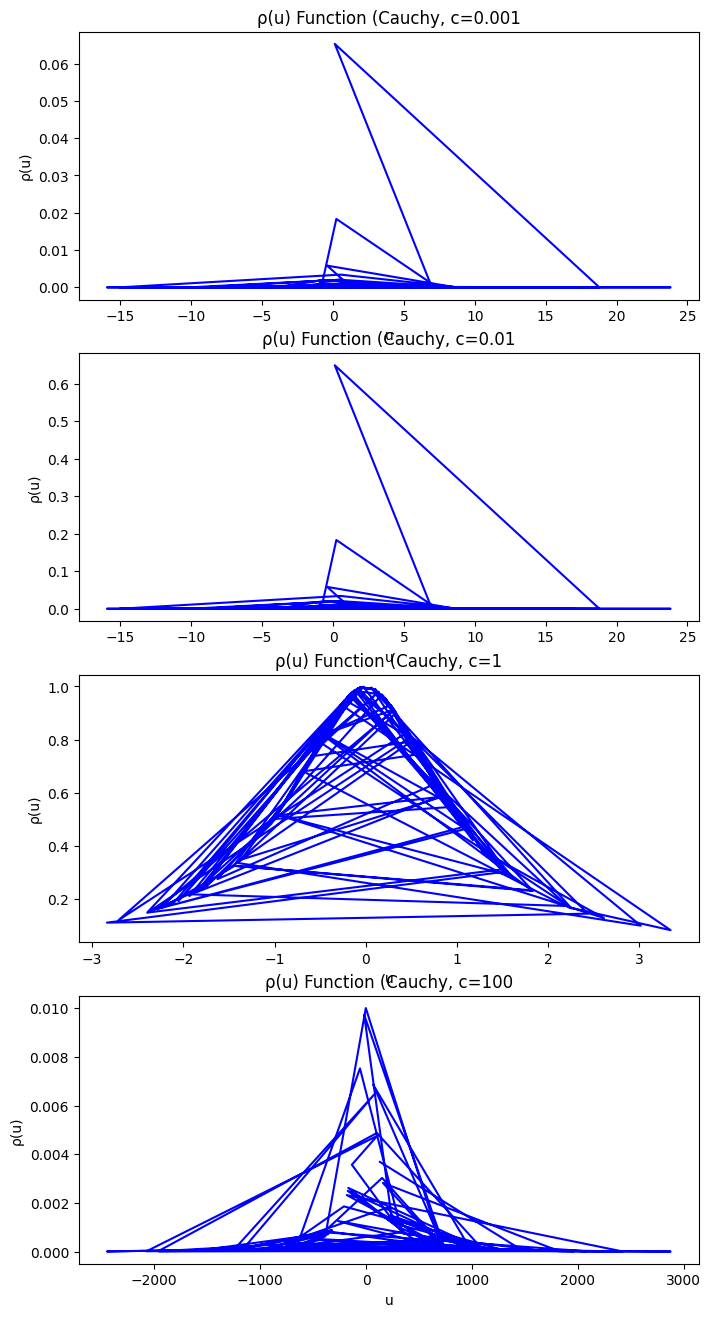

In [15]:
# create a 4x1 grid of plots
fig, axes = plt.subplots(4, 1, figsize=(8, 16))

for i, c in enumerate(c_values):

    # Cauchy
    w0_c = 0.0
    w1_c = 0.0

    for _ in range(num_iter):
        gradient_w0, gradient_w1 = gradient_Cauchy(x, y, w0_c, w1_c, c)
        w0_c -= a * gradient_w0
        w1_c -= a * gradient_w1

        if np.sqrt(gradient_w0**2 + gradient_w1**2) < stop_criteria:
            break

    # calculate the error values for Cauchy
    u_cauchy = y - (w0_c + w1_c * x)

    # calculate ρ(u) for the Cauchy function
    pu_values_cauchy = c / (c**2 + u_cauchy**2)

    # find the interval where the function behaves as a quadratic
    second_derivative = np.gradient(np.gradient(pu_values_cauchy))
    quadratic_interval = np.where(np.abs(second_derivative) < 1e-3)[0]

    # check if a quadratic behavior interval exists
    if quadratic_interval.size > 0:
      # define inliers and outliers based on the interval
      inliers = np.logical_and(u_cauchy > u_cauchy[quadratic_interval[0]], u_cauchy < u_cauchy[quadratic_interval[-1]])
      outliers = ~inliers

      # get the actual points of inliers and outliers
      inlier_points = list(zip(x[inliers], y[inliers]))
      outlier_points = list(zip(x[outliers], y[outliers]))

      # print the inliers and outliers
      print(f'Cauchy (c={c}):')
      print("Inliers:", inlier_points)
      print("Outliers:", outlier_points)
    else:
      print(f'Cauchy (c={c}): No valid quadratic behavior interval found')


    # create a plot on the grid for the ρ(u) of Cauchy
    ax_pu_cauchy = axes[i]
    ax_pu_cauchy.plot(u_cauchy, pu_values_cauchy, label=f'ρ(u) (Cauchy, c={c})', color='blue')
    ax_pu_cauchy.set_xlabel('u')
    ax_pu_cauchy.set_ylabel('ρ(u)')
    ax_pu_cauchy.set_title(f'ρ(u) Function (Cauchy, c={c}')

For c=1, we can see that no quadratic behavior interval was found.

Inliers" are the data points for which the u values fall within the quadratic behavior interval of the ρ(u) function. These are points that are well-modeled by the Cauchy distribution within that interval.

"Outliers" are the data points with u values outside the quadratic behavior interval. These points deviate significantly from the behavior of the Cauchy distribution in that specific interval and are considered as potential outliers.

Now we will illustrate the idea that the Cauchy function is not “perfect”, and it is not robust for any number of outliers.

Iteration 0 (c=0.01): w0 = 0.0000, w1 = 0.0000
Iteration 1 (c=0.01): w0 = 0.0000, w1 = 0.0000
Iteration 2 (c=0.01): w0 = 0.0000, w1 = 0.0000
Iteration 3 (c=0.01): w0 = 0.0000, w1 = 0.0000
Iteration 4 (c=0.01): w0 = 0.0000, w1 = 0.0000
Iteration 5 (c=0.01): w0 = 0.0000, w1 = 0.0000
Iteration 0 (c=1): w0 = -0.1413, w1 = 0.9580
Iteration 1 (c=1): w0 = -0.1353, w1 = 0.9615
Iteration 2 (c=1): w0 = -0.1300, w1 = 0.9675
Iteration 3 (c=1): w0 = -0.1228, w1 = 0.9734
Iteration 4 (c=1): w0 = -0.1168, w1 = 0.9826
Iteration 5 (c=1): w0 = -0.1168, w1 = 0.9826


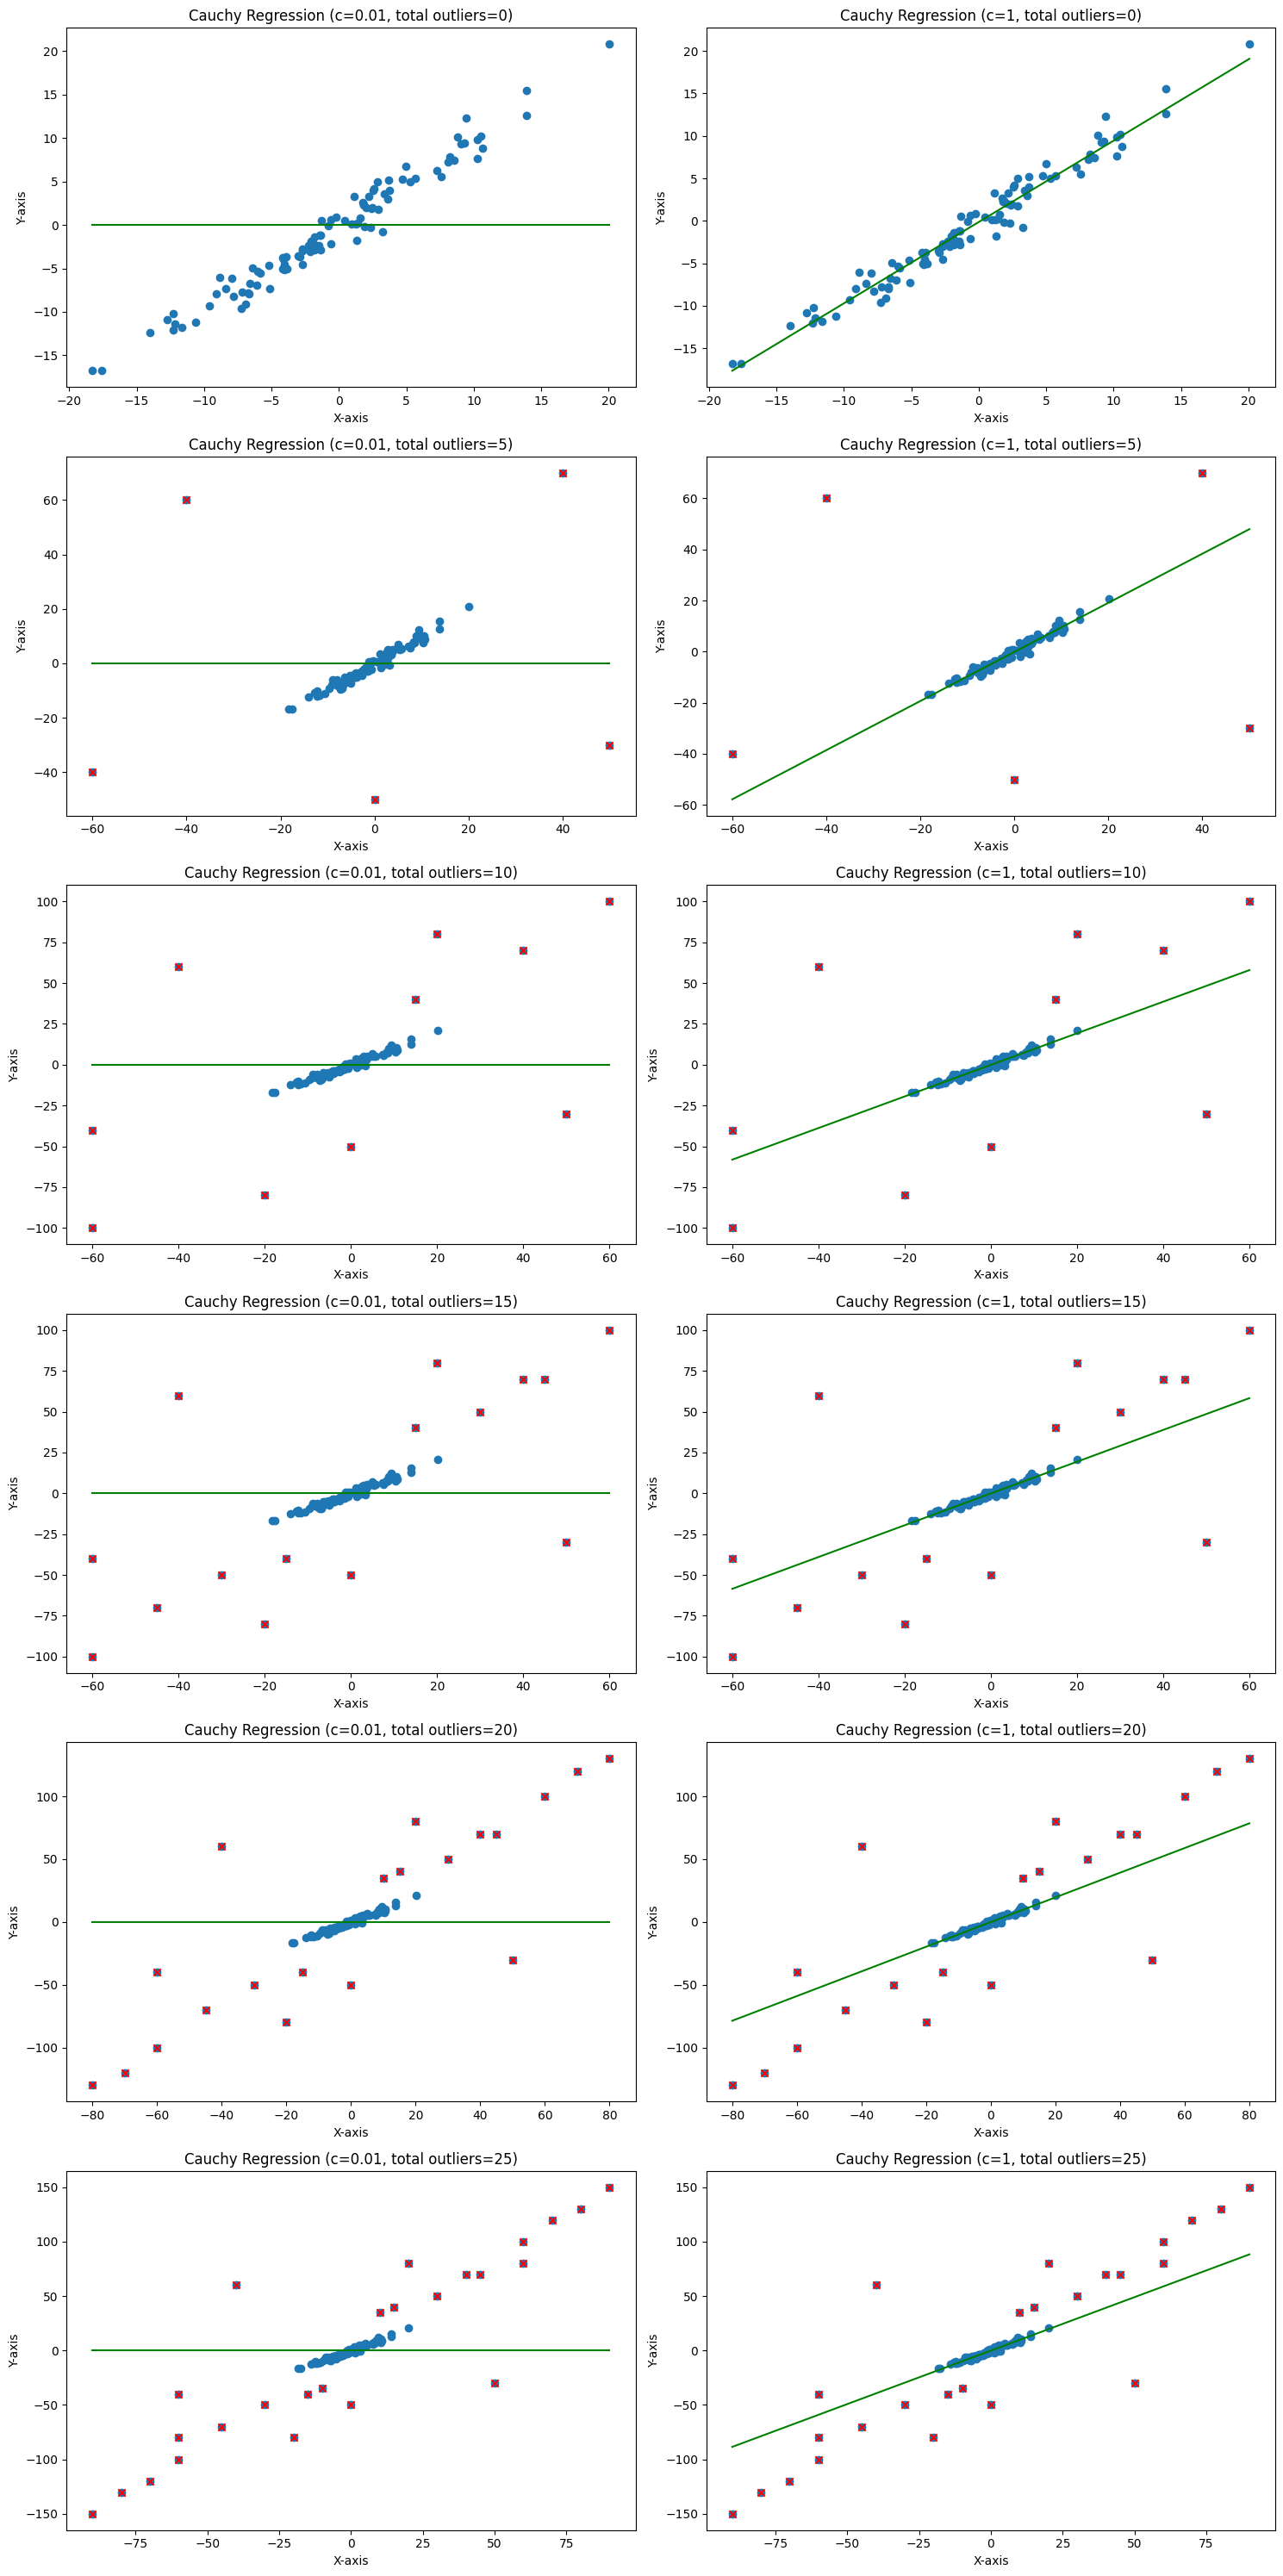

In [16]:
# create the dataset
m = [0., 0.]
angle = 45 * np.pi / 180
rot = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
lamb = np.array([[100, 0], [0, 1]])
s = np.dot(rot, np.dot(lamb, rot.T))
points = np.random.multivariate_normal(m, s, 100)

a = 0.01
num_iter = 1000
stop_criteria = 1e-5
c_values = [1/100, 1]

# outlier positions
outliers_x = [50, -60, -40, 40, 0, 20, -20, 60, -60, 15, -15, 30, -30, 45, -45, 70, -70, 80, -80, 10, -10, 60, -60, 90, -90]
outliers_y = [-30, -40, 60, 70, -50, 80, -80, 100, -100, 40, -40, 50, -50, 70, -70, 120, -120, 130, -130, 35, -35, 80, -80, 150, -150]

fig, axes = plt.subplots(6, 2, figsize=(15, 30))

# iterate over c values
for i, c in enumerate(c_values):

    # initialize the initial fit with the original data
    x = points[:, 0]
    y = points[:, 1]

    # iterate over outliers
    for j in range(6):
        ax = axes[j, i]
        ax.scatter(x, y)
        x_range = np.linspace(min(x), max(x), 100)

        # add 5 outliers
        for k in range(5):
            if j * 5 + k < len(outliers_x):
                x = np.concatenate((x, [outliers_x[j * 5 + k]]))
                y = np.concatenate((y, [outliers_y[j * 5 + k]]))

        w0_c = 0.0
        w1_c = 0.0

        # mark added outliers with a red 'x'
        ax.scatter(outliers_x[:j * 5], outliers_y[:j * 5], marker='x', color='red')

        for _ in range(num_iter):
            gradient_w0, gradient_w1 = gradient_Cauchy(x, y, w0_c, w1_c, c)
            w0_c -= a * gradient_w0
            w1_c -= a * gradient_w1
            if np.sqrt(gradient_w0**2 + gradient_w1**2) < stop_criteria:
                break

        y_pred_c = w1_c * x_range + w0_c
        ax.plot(x_range, y_pred_c, label=f'Cauchy (c={c})', color='green')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_title(f'Cauchy Regression (c={c}, total outliers={j * 5})')

        # print weights with c value
        print(f'Iteration {j} (c={c}): w0 = {w0_c:.4f}, w1 = {w1_c:.4f}')

plt.tight_layout()
plt.show()

When adding outliers to the dataset, especially extreme outliers, it can significantly affect the weights produced by the regression model. Outliers pull the line of fit towards them as the model tries to minimize the Cauchy loss.

Cauchy regression is designed to handle outliers more robustly than traditional linear regression. However, the robustness of the model depends on the choice of the c parameter and the extremity of the outliers. Smaller c values make the model more robust to outliers.